# Exercises

### Our scenario continues:
*As a customer analyst, I want to know who has spent the most money with us over their lifetime. I have monthly charges and tenure, so I think I will be able to use those two attributes as features to estimate total_charges. I need to do this within an average of $5.00 per customer.*

In [1]:
# prepare enviornment

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import warnings
warnings.filterwarnings("ignore")

import env
import wrangle
import split_scale

import features

In [2]:
#df = wrangle.wrangle_telco()

In [3]:
csv = pd.read_csv('~/GoogleDrive/Codeup/bayes-methodologies-exercises/cars.csv')

In [4]:
print(csv.info())
csv.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406 entries, 0 to 405
Data columns (total 9 columns):
Name                406 non-null object
Miles_per_Gallon    398 non-null float64
Cylinders           406 non-null int64
Displacement        406 non-null float64
Horsepower          400 non-null float64
Weight_in_lbs       406 non-null int64
Acceleration        406 non-null float64
Year                406 non-null object
Origin              406 non-null object
dtypes: float64(4), int64(2), object(3)
memory usage: 28.6+ KB
None


,Name,Miles_per_Gallon,Cylinders,Displacement,Horsepower,Weight_in_lbs,Acceleration,Year,Origin
0,chevrolet chevelle malibu,18.0,8,307.0,130.0,3504,12.0,1970-01-01,USA
1,buick skylark 320,15.0,8,350.0,165.0,3693,11.5,1970-01-01,USA
2,plymouth satellite,18.0,8,318.0,150.0,3436,11.0,1970-01-01,USA
3,amc rebel sst,16.0,8,304.0,150.0,3433,12.0,1970-01-01,USA
4,ford torino,17.0,8,302.0,140.0,3449,10.5,1970-01-01,USA
5,ford galaxie 500,15.0,8,429.0,198.0,4341,10.0,1970-01-01,USA
6,chevrolet impala,14.0,8,454.0,220.0,4354,9.0,1970-01-01,USA
7,plymouth fury iii,14.0,8,440.0,215.0,4312,8.5,1970-01-01,USA
8,pontiac catalina,14.0,8,455.0,225.0,4425,10.0,1970-01-01,USA
9,amc ambassador dpl,15.0,8,390.0,190.0,3850,8.5,1970-01-01,USA


In [5]:
df = (csv[['Miles_per_Gallon','Cylinders','Displacement','Horsepower','Weight_in_lbs','Acceleration']]
      .dropna()
      .rename(columns={'Miles_per_Gallon': 'mpg','Cylinders': 'cyl','Displacement': 'displ','Horsepower': 'hp','Weight_in_lbs': 'lbs','Acceleration':'accltn'})
     )
#df['dpc'] = df.displ / df.cyl
#df['hppc'] = df.hp / df.cyl
#df['dplb'] = df.displ / df.lbs
#df['hpplb'] = df.hp / df.lbs
#df['dphp'] = df.displ / df.hp
df = df.drop(columns={'cyl'})

In [6]:
print(df.info())
df.head(10)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 405
Data columns (total 5 columns):
mpg       392 non-null float64
displ     392 non-null float64
hp        392 non-null float64
lbs       392 non-null int64
accltn    392 non-null float64
dtypes: float64(4), int64(1)
memory usage: 18.4 KB
None


,mpg,displ,hp,lbs,accltn
0,18.0,307.0,130.0,3504,12.0
1,15.0,350.0,165.0,3693,11.5
2,18.0,318.0,150.0,3436,11.0
3,16.0,304.0,150.0,3433,12.0
4,17.0,302.0,140.0,3449,10.5
5,15.0,429.0,198.0,4341,10.0
6,14.0,454.0,220.0,4354,9.0
7,14.0,440.0,215.0,4312,8.5
8,14.0,455.0,225.0,4425,10.0
9,15.0,390.0,190.0,3850,8.5


In [7]:
X_train, X_test, y_train, y_test = split_scale.split_my_data(df, 'mpg', train_pct=.8, random_state=123)

In [8]:
print(X_train.info())
X_train.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 313 entries, 6 to 378
Data columns (total 4 columns):
displ     313 non-null float64
hp        313 non-null float64
lbs       313 non-null int64
accltn    313 non-null float64
dtypes: float64(3), int64(1)
memory usage: 12.2 KB
None


,displ,hp,lbs,accltn
6,454.0,220.0,4354,9.0
301,86.0,65.0,1975,15.2
129,121.0,110.0,2660,14.0
179,90.0,71.0,2223,16.5
115,97.0,88.0,2279,19.0


In [9]:
print(X_test.info())
X_test.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 79 entries, 229 to 198
Data columns (total 4 columns):
displ     79 non-null float64
hp        79 non-null float64
lbs       79 non-null int64
accltn    79 non-null float64
dtypes: float64(3), int64(1)
memory usage: 3.1 KB
None


,displ,hp,lbs,accltn
229,260.0,110.0,4060,19.0
254,85.0,70.0,2070,18.6
143,302.0,140.0,4141,14.0
156,120.0,97.0,2489,15.0
404,120.0,79.0,2625,18.6


In [10]:
print(y_train.info())
y_train.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 313 entries, 6 to 378
Data columns (total 1 columns):
mpg    313 non-null float64
dtypes: float64(1)
memory usage: 4.9 KB
None


,mpg
6,14.0
301,34.1
129,24.0
179,25.0
115,20.0


In [11]:
print(y_test.info())
y_test.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 79 entries, 229 to 198
Data columns (total 1 columns):
mpg    79 non-null float64
dtypes: float64(1)
memory usage: 1.2 KB
None


,mpg
229,17.0
254,39.4
143,16.0
156,24.0
404,28.0


### Scaled X y tables

In [12]:
X_scalar, X_train_scaled, X_test_scaled = split_scale.min_max_scaler(X_train, X_test)
y_scaler, y_train_scaled, y_test_scaled = split_scale.min_max_scaler(y_train, y_test)
X_train['dummy_val'] = 1
X_test['dummy_val'] = 1
X_train_scaled['dummy_val'] = 1
X_test_scaled['dummy_val'] = 1

In [13]:
print(X_train_scaled.info())
X_train_scaled.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 313 entries, 6 to 378
Data columns (total 5 columns):
displ        313 non-null float64
hp           313 non-null float64
lbs          313 non-null float64
accltn       313 non-null float64
dummy_val    313 non-null int64
dtypes: float64(4), int64(1)
memory usage: 14.7 KB
None


,displ,hp,lbs,accltn,dummy_val
6,0.997416,0.945652,0.777148,0.030675,1
301,0.046512,0.103261,0.102637,0.411043,1
129,0.136951,0.347826,0.296853,0.337423,1
179,0.056848,0.135870,0.172952,0.490798,1
115,0.074935,0.228261,0.188829,0.644172,1


In [14]:
print(X_test_scaled.info())
X_test_scaled.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 79 entries, 229 to 198
Data columns (total 5 columns):
displ        79 non-null float64
hp           79 non-null float64
lbs          79 non-null float64
accltn       79 non-null float64
dummy_val    79 non-null int64
dtypes: float64(4), int64(1)
memory usage: 3.7 KB
None


,displ,hp,lbs,accltn,dummy_val
229,0.496124,0.347826,0.693791,0.644172,1
254,0.043928,0.130435,0.129572,0.619632,1
143,0.604651,0.510870,0.716756,0.337423,1
156,0.134367,0.277174,0.248370,0.398773,1
404,0.134367,0.179348,0.286929,0.619632,1


In [15]:
print(y_train_scaled.info())
y_train_scaled.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 313 entries, 6 to 378
Data columns (total 1 columns):
mpg    313 non-null float64
dtypes: float64(1)
memory usage: 4.9 KB
None


,mpg
6,0.132979
301,0.667553
129,0.398936
179,0.425532
115,0.292553


In [16]:
print(y_test_scaled.info())
y_test_scaled.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 79 entries, 229 to 198
Data columns (total 1 columns):
mpg    79 non-null float64
dtypes: float64(1)
memory usage: 1.2 KB
None


,mpg
229,0.212766
254,0.808511
143,0.186170
156,0.398936
404,0.505319


In [17]:
df_scaled = X_train_scaled.join(y_train_scaled)

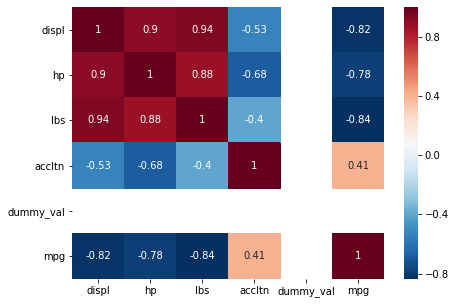

In [18]:
#Using Pearson Correlation
plt.figure(figsize=(7,5))
cor = df_scaled.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.RdBu_r)
plt.show()

<Figure size 720x576 with 0 Axes>

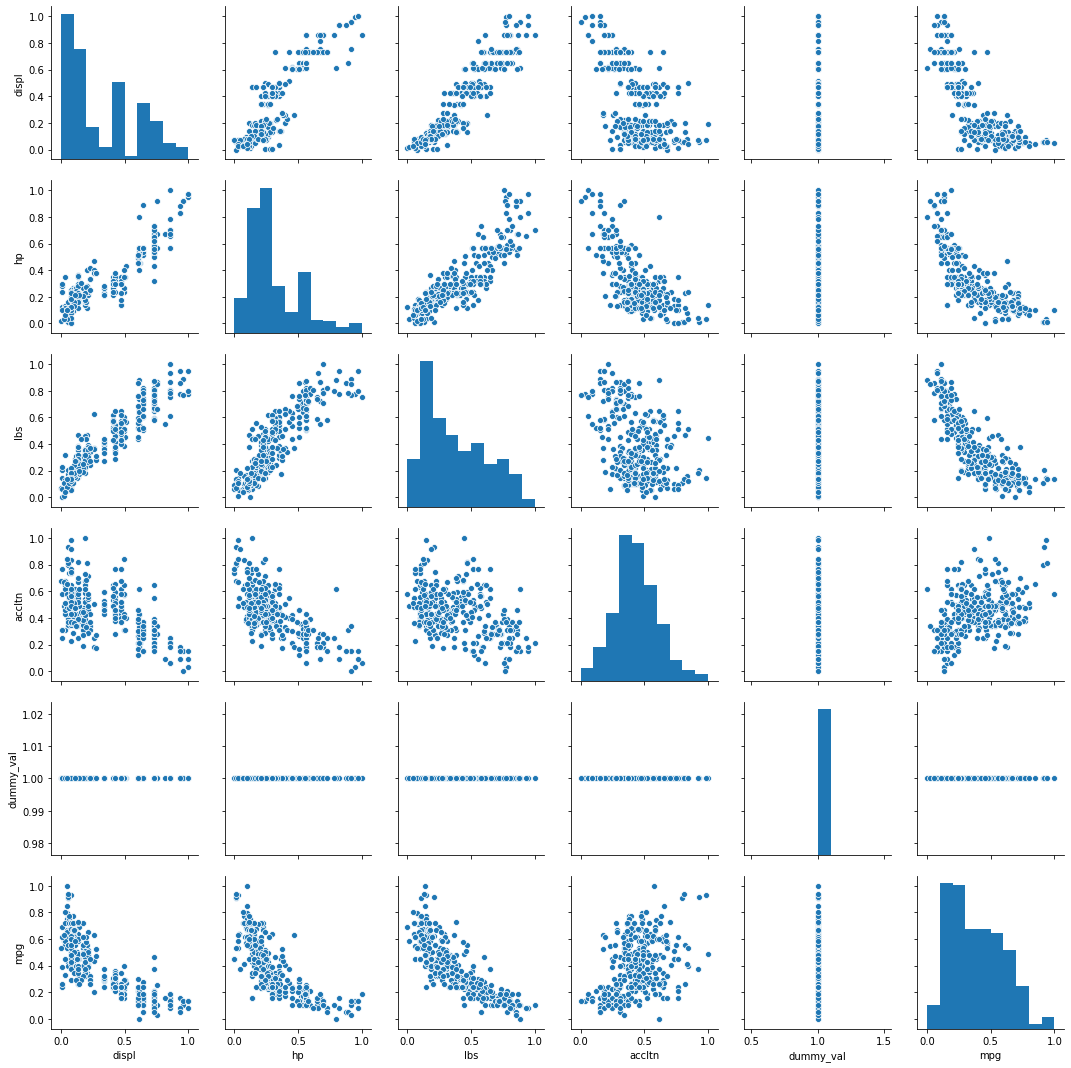

In [19]:
plt.figure(figsize=(10,8))
sns.pairplot(data=df_scaled)
plt.show()

1. **Write a function,** 
`select_kbest_freg_unscaled()` 
**that takes X_train, y_train and k as input (X_train and y_train should not be scaled!) and returns a list of the top k features.**

In [20]:
from sklearn.feature_selection import SelectKBest, f_regression 

In [21]:
def select_kbest_freg_unscaled(X_train, y_train, k=2):
    f_selector = SelectKBest(f_regression, k=k)
    f_selector.fit(X_train, y_train)
    f_support = f_selector.get_support()
    f_feature = X_train.loc[:,f_support].columns.tolist()
    return f_feature, f_selector

In [22]:
f_feature, f_selector = (
    features.select_kbest_freg_unscaled(
        X_train, y_train, 2)
)

X_scores = (pd.DataFrame(
    list(
        zip(X_train.columns, f_selector.scores_)
    ), 
    columns=['variable', 'f_score'])
                   .sort_values(by=['f_score'], axis=0, ascending=False))
print(str(len(f_feature)), 'selected features')
print(f_feature)
X_scores

2 selected features
['displ', 'lbs']


,variable,f_score
2,lbs,720.782037
0,displ,621.032903
1,hp,479.771724
3,accltn,62.675120
4,dummy_val,NaN


2. **Write a function,** 
`select_kbest_freg_scaled()`
**that takes X_train, y_train (scaled) and k as input and returns a list of the top k features.**

In [23]:
def select_kbest_freg_scaled(X_train_scaled, y_train, k=4):
    f_feature_scaled, f_selector_scaled = (
        select_kbest_freg_unscaled(
            X_train=X_train_scaled, 
            y_train=y_train_scaled, 
            k=k)
    )
    
    return f_feature_scaled, f_selector_scaled

In [24]:
f_feature_scaled, f_selector_scaled = (
    features.select_kbest_freg_scaled(
        X_train_scaled, y_train_scaled, 2)
)

X_scores_scaled = (pd.DataFrame(
    list(
        zip(X_train_scaled.columns, f_selector_scaled.scores_)
    ), 
    columns=['variable', 'f_score'])
                   .sort_values(by=['f_score'], axis=0, ascending=False))
                  
print(str(len(f_feature_scaled)), 'selected features')
print(f_feature_scaled)
X_scores_scaled

2 selected features
['displ', 'lbs']


,variable,f_score
2,lbs,720.782037
0,displ,621.032903
1,hp,479.771724
3,accltn,62.675120
4,dummy_val,NaN


3. **Write a function,** 
`ols_backward_elimination()`
**that takes X_train and y_train (scaled) as input and returns selected features based on the ols backwards elimination method.**

In [25]:
import statsmodels.api as sm

In [26]:
def get_fit_summary(y_train_scaled, X_train_scaled):
    # create the OLS object:
    ols_model = sm.OLS(y_train_scaled, X_train_scaled)
    # fit the model:
    fit = ols_model.fit()
    # summarize:
    return fit.summary()

In [27]:
features.get_fit_summary(y_train_scaled, X_train_scaled)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.710
Model:                            OLS   Adj. R-squared:                  0.707
Method:                 Least Squares   F-statistic:                     188.9
Date:                Thu, 17 Oct 2019   Prob (F-statistic):           1.41e-81
Time:                        09:55:57   Log-Likelihood:                 242.41
No. Observations:                 313   AIC:                            -474.8
Df Residuals:                     308   BIC:                            -456.1
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
displ         -0.1281      0.080     -1.600      0.111      -0.286       0.029
hp            -0.1414      0.095     -1.482      0.139      -0.329       0.046
lbs           -0.4740      0.091     -5.181      0.000      -0.654      -0.294
accltn         0.0012      0.061      0.019      0.985      -0.118       0.121
dummy_val      0.6546      0.036     18.174      0.000       0.584       0.726
==============================================================================
Omnibus:                       24.786   Durbin-Watson:                   2.030
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               31.404
Skew:                           0.607   Prob(JB):                     1.52e-07
Kurtosis:                       3.966   Cond. No.                         25.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [28]:
features.get_fit_summary(y_train, X_train_scaled)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.710
Model:                            OLS   Adj. R-squared:                  0.707
Method:                 Least Squares   F-statistic:                     188.9
Date:                Thu, 17 Oct 2019   Prob (F-statistic):           1.41e-81
Time:                        09:55:57   Log-Likelihood:                -892.84
No. Observations:                 313   AIC:                             1796.
Df Residuals:                     308   BIC:                             1814.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
displ         -4.8166      3.010     -1.600      0.111     -10.740       1.107
hp            -5.3149      3.587     -1.482      0.139     -12.374       1.744
lbs          -17.8218      3.440     -5.181      0.000     -24.590     -11.054
accltn         0.0433      2.282      0.019      0.985      -4.447       4.534
dummy_val     33.6146      1.354     24.819      0.000      30.950      36.280
==============================================================================
Omnibus:                       24.786   Durbin-Watson:                   2.030
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               31.404
Skew:                           0.607   Prob(JB):                     1.52e-07
Kurtosis:                       3.966   Cond. No.                         25.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [29]:
def ols_backward_elimination(X_train_scaled, y_train_scaled):
    cols = list(X_train_scaled.columns)
    cols_removed = []
    removed_pvals = []
    pmax = 1
    while (len(cols)>0):
        p= []
        X_1 = X_train_scaled[cols]
        X_1 = sm.add_constant(X_1)
        model = sm.OLS(y_train_scaled,X_1).fit()
        p = pd.Series(model.pvalues.values[1:],index = cols)
        pmax = max(p)
        feature_with_p_max = p.idxmax()
        if(pmax>0.05):
            cols_removed.append(feature_with_p_max)
            removed_pvals.append(pmax)
            cols.remove(feature_with_p_max)
        else:
            break
            
    selected_features_BE = cols
    removed_features_BE = cols_removed
    removed_pvals_BE = removed_pvals
    return selected_features_BE, removed_features_BE, removed_pvals_BE

In [30]:
# Come back and check error ...

#selected_features_BE, removed_features_BE, removed_pvals_BE = features.ols_backward_elimination(X_train_scaled, y_train_scaled)
#print(selected_features_BE)
#print(removed_features_BE)
#print(removed_pvals_BE)
#removals = list(zip(removed_features_BE, removed_pvals_BE))
#for feature in removals:
#    print(f'Feature removed: {feature[0]}; p_value = {feature[1]:.4f}')


4. **Write a function,** 
`lasso_cv_coef()` 
**that takes X_train and y_train as input and returns the coefficients for each feature, along with a plot of the features and their weights.**

In [31]:
from sklearn.linear_model import LassoCV
import matplotlib

In [32]:
# reg = LassoCV().fit(X_train_scaled, y_train_scaled)

# print("Best alpha using built-in LassoCV: %f" % reg.alpha_)
# print("Best score using built-in LassoCV: %f" %reg.score(X_train,y_train))
# coef = pd.Series(reg.coef_, index = X_train.columns)


# print("Lasso picked " + str(sum(coef != 0)) + 
#       " variables and eliminated the other " +  
#       str(sum(coef == 0)) + " variables")
# pd.DataFrame(coef)

In [33]:
# imp_coef = coef.sort_values()

# matplotlib.rcParams['figure.figsize'] = (4.0, 5.0)
# imp_coef.plot(kind = "barh")
# plt.title("Feature importance using Lasso Model")

In [34]:
def lasso_cv_coef(X_train, y_train, plotit=True, summarize=True):
    '''
lasso_cv_coef(X_train, y_train, plotit=True, summarize=True)
plotit produces plot at runtime
summarize returns printed summary
RETURNS: model, alpha, score, coef, yhat    
    '''
    model = LassoCV().fit(X_train, y_train)
    alpha = model.alpha_
    score = model.score(X_train, y_train)
    coef = pd.Series(model.coef_, index = X_train.columns)
    yhat = model.predict(X_train)
    if summarize:
        imp_coef = coef.sort_values()
        vars_kept = sum(coef != 0)
        vars_elim = sum(coef == 0)
        print("Best alpha using built-in LassoCV: %f" %model.alpha_)
        print("Best score using built-in LassoCV: %f" %model.score(X_train,y_train))
        print("Lasso picked " + str(sum(coef != 0)) + 
              " variables and eliminated the other " +  
              str(sum(coef == 0)) + " variables")
        print(pd.DataFrame(coef))
    if plotit:
        imp_coef = coef.sort_values()
        matplotlib.rcParams['figure.figsize'] = (4.0, 5.0)
        imp_coef.plot(kind = "barh")
        plt.title("Feature importance using Lasso Model")
        plt.plot()
    return model, alpha, score, coef, yhat

Best alpha using built-in LassoCV: 0.001213
Best score using built-in LassoCV: 0.709545
Lasso picked 3 variables and eliminated the other 2 variables
                  0
displ     -0.156792
hp        -0.101252
lbs       -0.453905
accltn     0.000000
dummy_val  0.000000


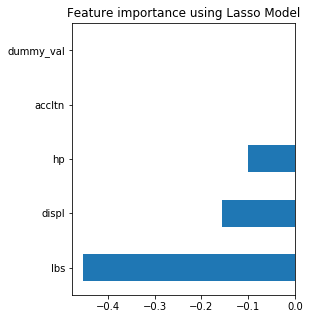

In [35]:
lasso_model, lasso_alpha, lasso_score, lasso_coef, lasso_yhat = \
    features.lasso_cv_coef(X_train=X_train_scaled, y_train=y_train_scaled, plotit=True, summarize=True)

5. **Write 3 functions ...**

In [36]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

In [37]:
model = LinearRegression()

#Initializing RFE model, with parameter to select top 2 features. 
rfe = RFE(model, 3)

#Transforming data using RFE
X_rfe = rfe.fit_transform(X_train_scaled,y_train_scaled)  

#Fitting the data to model
model.fit(X_rfe,y_train)

print(rfe.support_)
print(rfe.ranking_)
rfe

[ True  True  True False False]
[1 1 1 2 3]


RFE(estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                               normalize=False),
    n_features_to_select=3, step=1, verbose=0)

In [38]:
cols = list(X_train.columns)
model = LinearRegression()

#Initializing RFE model
rfe = RFE(model, 3)

#Transforming data using RFE
X_rfe = rfe.fit_transform(X_train_scaled,y_train_scaled)  

#Fitting the data to model
model.fit(X_rfe,y_train)
temp = pd.Series(rfe.support_,index = cols)
selected_features_rfe = temp[temp==True].index

print(selected_features_rfe)

Index(['displ', 'hp', 'lbs'], dtype='object')


   - **The first computes the number of optimum features (n) using rfe**

In [95]:
def optimal_number_of_features(X_train, y_train):
    '''
    optimal_number_of_features(X_train, y_train, X_test, y_test)
    RETURNS: number_of_features
    
    discover the optimal number of features, n, using our scaled x and y dataframes, recursive feature
    elimination and linear regression (to test the performance with each number of features).
    We will use the output of this function (the number of features) as input to the next function
    optimal_features, which will then run recursive feature elimination to find the n best features
    '''

    number_of_attributes = X_train.shape[1]
    number_of_features_list=np.arange(1,number_of_attributes + 1) # found error - needed to add 1 to attributes
    high_score=0
    
    #Variable to store the optimum features
    number_of_features=0           
    score_list =[]
    
    for n in range(len(number_of_features_list)):
        model = LinearRegression()
        rfe = RFE(model,number_of_features_list[n])
        X_train_rfe = rfe.fit_transform(X_train,y_train)
        #X_test_rfe = rfe.transform(X_test)
        model.fit(X_train_rfe,y_train)
        score = model.score(X_train_rfe,y_train)
        score_list.append(score)
        # print(f'Features: {number_of_features_list[n]}; score: {score:.6f}')
        if(score>high_score):
            # print('new high score!')
            high_score = score
            number_of_features = number_of_features_list[n]
    return number_of_features

In [96]:
number_of_features = optimal_number_of_features(X_train_scaled, y_train_scaled)
print(number_of_features)

4


   - **The second takes n as input and returns the top n features**

In [97]:
def optimal_features(X_train, y_train, number_of_features):
    '''
    optimal_features(X_train, y_train, number_of_features)
    RETURNS: selected_features_rfe
    
    Taking the output of optimal_number_of_features, as n, and use that value to 
    run recursive feature elimination to find the n best features'''
    cols = list(X_train.columns)
    model = LinearRegression()
    
    #Initializing RFE model
    rfe = RFE(model, number_of_features)

    #Transforming data using RFE
    X_rfe = rfe.fit_transform(X_train,y_train)  

    #Fitting the data to model
    model.fit(X_rfe,y_train)
    temp = pd.Series(rfe.support_,index = cols)
    selected_features_rfe = temp[temp==True].index
    
    return selected_features_rfe

In [98]:
selected_features_rfe = optimal_features(X_train_scaled, y_train_scaled, number_of_features)
selected_features_rfe

Index(['displ', 'hp', 'lbs', 'accltn'], dtype='object')

   - **The third takes the list of the top n features as input and returns a new X_train and X_test dataframe with those top features,** 
   `recursive_feature_elimination()` 
   **that computes the optimum number of features (n) and returns the top n features.**

In [99]:
def create_optimal_dataframe(X_train, X_test, selected_features_rfe):
    '''
    create_optimal_dataframe(X_train, X_test, selected_features)
    RETURNS X_train_optimal, X_test_optimal

    Takes output of optimal_features and creates new optimized X_train and X_test
    dataframes containing only those features..
    '''

    X_train_optimal = X_train[selected_features_rfe]
    X_test_optimal = X_test[selected_features_rfe]

    return X_train_optimal, X_test_optimal

In [100]:
X_train_optimal, X_test_optimal = create_optimal_dataframe(X_train_scaled, X_test_scaled, selected_features_rfe)

In [101]:
X_train_optimal.join(y_train_scaled).head(5)

,displ,hp,lbs,accltn,mpg
6,0.997416,0.945652,0.777148,0.030675,0.132979
301,0.046512,0.103261,0.102637,0.411043,0.667553
129,0.136951,0.347826,0.296853,0.337423,0.398936
179,0.056848,0.135870,0.172952,0.490798,0.425532
115,0.074935,0.228261,0.188829,0.644172,0.292553


In [102]:
X_test_optimal.join(y_test_scaled).head(5)

,displ,hp,lbs,accltn,mpg
229,0.496124,0.347826,0.693791,0.644172,0.212766
254,0.043928,0.130435,0.129572,0.619632,0.808511
143,0.604651,0.510870,0.716756,0.337423,0.186170
156,0.134367,0.277174,0.248370,0.398773,0.398936
404,0.134367,0.179348,0.286929,0.619632,0.505319


In [103]:
def recursive_feature_elimination(X_train, y_train, X_test, y_test):
    '''
    recursive_feature_elimination(X_train, y_train, X_test, y_test)
    RETURNS X_train_optimal, X_test_optimal

    Combines optimal_number_of_features, optimal_features, and 
    create_optimal_dataframe into one single function. Accepts X and y train and 
    test dataframes, returns optimal X train and test dataframes.
    '''

    number_of_features = optimal_number_of_features(X_train, y_train)
    selected_features_rfe = optimal_features(X_train, y_train, number_of_features)
    X_train_rfe, X_test_rfe = create_optimal_dataframe(X_train, X_test, selected_features_rfe)

    return X_train_rfe, X_test_rfe

In [104]:
X_train_rfe, X_test_rfe = recursive_feature_elimination(X_train_scaled, y_train_scaled, X_test_scaled, y_test_scaled)

In [105]:
X_train_rfe.join(y_train_scaled).head()

,displ,hp,lbs,accltn,mpg
6,0.997416,0.945652,0.777148,0.030675,0.132979
301,0.046512,0.103261,0.102637,0.411043,0.667553
129,0.136951,0.347826,0.296853,0.337423,0.398936
179,0.056848,0.135870,0.172952,0.490798,0.425532
115,0.074935,0.228261,0.188829,0.644172,0.292553


In [106]:
X_test_rfe.join(y_test_scaled).head()

,displ,hp,lbs,accltn,mpg
229,0.496124,0.347826,0.693791,0.644172,0.212766
254,0.043928,0.130435,0.129572,0.619632,0.808511
143,0.604651,0.510870,0.716756,0.337423,0.186170
156,0.134367,0.277174,0.248370,0.398773,0.398936
404,0.134367,0.179348,0.286929,0.619632,0.505319


In [107]:
X_train_rfe2, X_test_rfe2 = recursive_feature_elimination(X_train_rfe, y_train_scaled, X_test_rfe, y_test_scaled)

In [108]:
X_train_rfe2.join(y_train_scaled).head()

,displ,hp,lbs,accltn,mpg
6,0.997416,0.945652,0.777148,0.030675,0.132979
301,0.046512,0.103261,0.102637,0.411043,0.667553
129,0.136951,0.347826,0.296853,0.337423,0.398936
179,0.056848,0.135870,0.172952,0.490798,0.425532
115,0.074935,0.228261,0.188829,0.644172,0.292553
